# Note for representation theorists

This note is for those who study the representation theory of finite-dimensional (artin) algebras.
I will explain how kappa maps appears in the representation theory.

## References

- [DIRRT] L. Demonet, O. Iyama, N. Reading, I. Reiten, H. Thomas,
  Lattice theory of torsion classes, arXiv:1711.01785.
- [BCZ] E. Barnard, G. Todorov, S. Zhu,
  Dynamical Combinatorics and Torsion Classes,
  J. Pure Appl. Algebra 225 (2021), no. 9, 106642.
- [RST] N. Reading, D. E. Speyer, H. Thomas,
  The fundamental theorem of finite semidistributive lattices,
  arXiv:1907.08050.

## Lattice of torsion classes in Sage

Recently, many people (including me) have been considering the lattice of torsion classes.

Let $\Lambda$ be a finite-dimensional algebra. Then consider $L:=\mathsf{tors}\,\Lambda$, the complete lattice of torsion lattices. Assume further that $\Lambda$ is **$\tau$-tilting finite**, which means that $\mathsf{tors}\,\Lambda$ is a **finite** lattice.

This lattice $L$ is a **semidistributive** lattice, that is, if $\mathcal{T} \cap \mathcal{U}_1 = \mathcal{T} \cap \mathcal{U}_2$, then $\mathcal{T} \cap (\mathcal{U}_1 \vee \mathcal{U}_2) = \mathcal{T} \cap \mathcal{U}_1\, ( = \mathcal{T} \cap \mathcal{U}_2)$ holds, and the dual condition is satisfied. The key fact to prove this is the equality $\mathcal{U}_1 \vee \mathcal{U}_2 = \mathsf{Filt}\,(\mathcal{U}_1 \cup \mathcal{U_2})$, and the dual condition is automatic by the standard duality (see [DIRRT Theorem 3.1] for the precise proof). ~~Thus we do not have to remember the definition of semidistributivity like me.~~

Let's look at some examples in sage. The easiest non-trivial lattice which is isomorphic to the lattice of torsion class is:

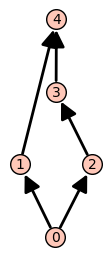

In [12]:
L_A2 = posets.PentagonPoset()
L_A2.plot(figsize=4)

This lattice ``L`` is nothing but $\mathsf{tors}\, \Lambda$ for $\Lambda = kQ$ for $Q = [1 \to 2]$. *Note that the Hasse quiver in Sage is opposite of the representation-theorist's Hasse quiver convention*, thus the node ``0`` is the smallest element. **In this document, we follow representation-theoretist's convention**.

The following ``L_pp`` is $\mathsf{tors}\, \Pi$ where $\Pi$ is a preprojective algebra of type $A_3$, since $\mathsf{tors}\,\Pi$ is isomorphic to the lattice of weak order on the Weyl group $W$ of type $A_3$. In this way, we can construct the lattice of torsion classes for any preprojective algebra of Dynkin type.

In [24]:
W = WeylGroup("A3", prefix = "s")
L_pp = W.weak_lattice()

Moreover, we can construct the lattice of torsion classes for any Dynkin path algebra, since it is isomorphic to the Cambrian lattice.
For example, the following ``L_A3`` is $\mathsf{tors}\,\Lambda$ for $\Lambda = k[1 \leftarrow 2 \to 3]$, where ``(1,3,2)`` represents the Coxeter element $s_1 s_3 s_2$ corresponding to the orientation $1 \leftarrow 2 \to 3$. 

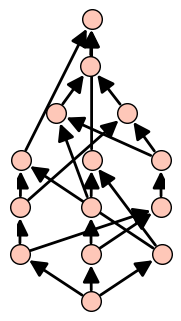

In [51]:
L_A3 = W.cambrian_lattice((1,3,2))
L_A3.plot(label_elements=False, figsize = 5)

Or we can construct this lattice by using $c_Q$-sortable elements as follows.

In [54]:
c_Q = W.from_reduced_word([1,3,2])
LL_A3 = L_pp.subposet([w for w in W if w.is_coxeter_sortable(c_Q)])

In [55]:
LL_A3.is_isomorphic(L_A3)

True

## Brick labeling

In [DIRRT] and [BCZ], the labeling of arrows in the Hasse quiver of $L$ was introduced, which assign a brick to each arrow defined as follows (recall that a brick is a module with a division endomorphism ring).

Suppose that there is an arrow $\mathcal{T} \to \mathcal{U}$, namely, $\mathcal{T}\supsetneq \mathcal{U}$ is a minimal inclusion of torsion classes.
Then [DIRRT Theorem 3.3] shows that **there uniquely exists a brick $B$ contained in the category $\mathcal{T} \cap \mathcal{U}^\perp$**, where $\mathcal{U}^\perp$ is the Hom-perpendicular category of $\mathcal{U}$, that is, the torsion-free class corresponding to $\mathcal{U}$. Thus we can put a brick $B$ on the arrow $\mathcal{T} \to \mathcal{U}$, which is called a *brick labeling*.

## Join-irreducible torsion classes and bricks

Now consider when a torsion class $\mathcal{T}$ cannot be written as a join of other torsion classes properly contained in $\mathcal{T}$. Such an element of $\mathcal{T} \in L$ is called **join-irreducible**. This is a purely lattice-theoretic notion, but surprisingly, there is a representation-theoretic description of join-irreducibles as follows [DIRRT Theorem 1.4]:

We have a bijection between
- the set of join-irreducible elements in $L$, and
- the set of bricks in $\mathsf{mod}\,\Lambda$.

The maps are given as follows.
- For a brick $B$, consider $\mathsf{T}(B)$, the smallest torsion class containing $B$.
- For a join-irreducible torsion class $\mathcal{T}$, there uniquely exists a torsion class $\mathcal{T}_*$ such that $\mathcal{T} \supsetneq \mathcal{T}_*$ is a minimal inclusion (this follows from lattice theory). Then there uniquely exists a brick contained in the category $\mathcal{T} \cap \mathcal{T}_*^\perp$.

Here $(-)^\perp$ is the Hom-orthogonal subcategory (which is a torsion-free class). This is very interesting phenomenon.

## Join-irreducibles and meed-irreducibles

Of course, one may dualize the above bijection by the standard duality: there is a bijection between the set of bricks and the set of join-irreducible elements in the lattice of torsion-free classes. Since the lattice of torsion-free classes is the opposite of $L$, the second set can be regarded as the set of **meet-irreducible** element in $L$. By combining, we obtain the following bijections.

$$
\{\text{join-irreducibles in $L$}\} \rightleftarrows \{\text{bricks}\} \rightleftarrows \{\text{meet-irreducibles in $L$}\}
$$

Therefore, it is natural to ask *what the composition of these map is*. **This is the kappa map, which gives a bijection between join-irreducibles and meet-irreducibles for a general finite semidistributive lattice**.